In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [4]:
df.shape

(7043, 21)

# Problem Statement:-

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 



In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
c=df.customerID
df=df.drop('customerID',axis=1)

In [9]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
for col in df:
    if df[col].dtypes=='object':
        print(df[col].value_counts())
        print(col)
        print('^'*100)

Male      3555
Female    3488
Name: gender, dtype: int64
gender
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
No     3641
Yes    3402
Name: Partner, dtype: int64
Partner
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
No     4933
Yes    2110
Name: Dependents, dtype: int64
Dependents
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Yes    6361
No      682
Name: PhoneService, dtype: int64
PhoneService
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
MultipleLines
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
InternetService


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

# EDA 

## Univariate Analysis

In [14]:
labels='Male','Female'


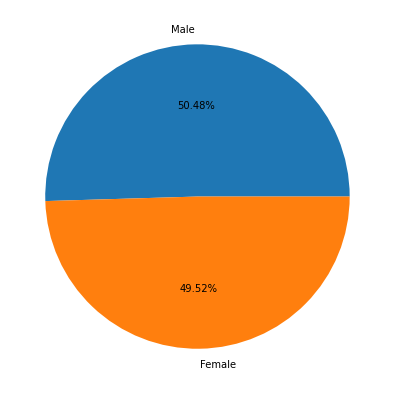

In [15]:
labels='Male','Female'
plt.figure(figsize=(7,7))
plt.pie(df['gender'].value_counts(),autopct='%.2f%%',labels=labels)
plt.show()

### Observation:- Around 50.48% frequecy of male and 49.5% female customer present 

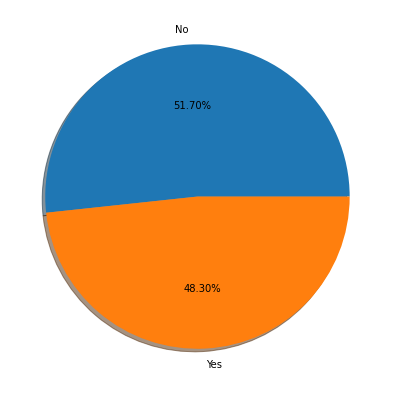

In [16]:
labels='No','Yes'
plt.figure(figsize=(7,7))
plt.pie(df['Partner'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Partners are less as compared to Yes 

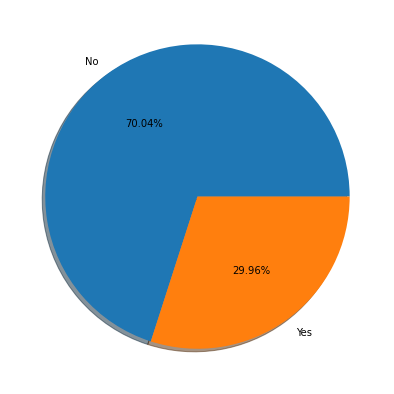

In [17]:
labels='No','Yes'
plt.figure(figsize=(7,7))
plt.pie(df['Dependents'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

# Observation:- The dependent percentages is low as compared to those having dependents

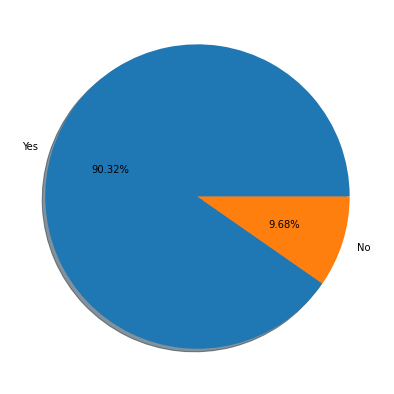

In [18]:
labels='Yes','No'
plt.figure(figsize=(7,7))
plt.pie(df['PhoneService'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Around 90 percent of the user uses phone service

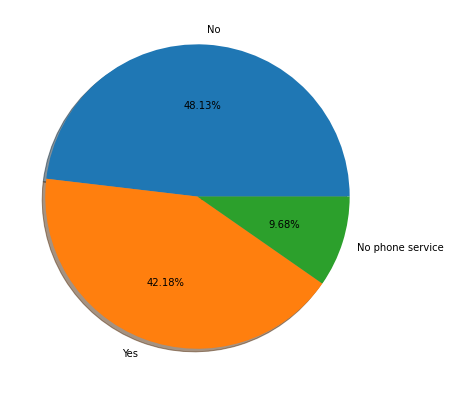

In [19]:
labels='No','Yes','No phone service'
plt.figure(figsize=(7,7))
plt.pie(df['MultipleLines'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the user does not uses multiline services

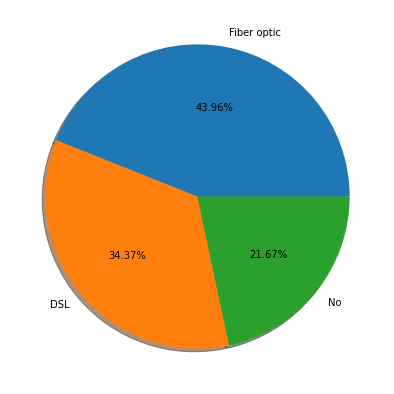

In [20]:
labels='Fiber optic','DSL','No'
plt.figure(figsize=(7,7))
plt.pie(df['InternetService'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the user using fiber optic caple

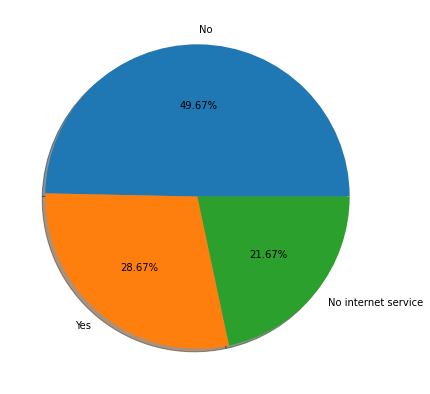

In [21]:
labels='No','Yes','No internet service'
plt.figure(figsize=(7,7))
plt.pie(df['OnlineSecurity'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the customer is not using online security

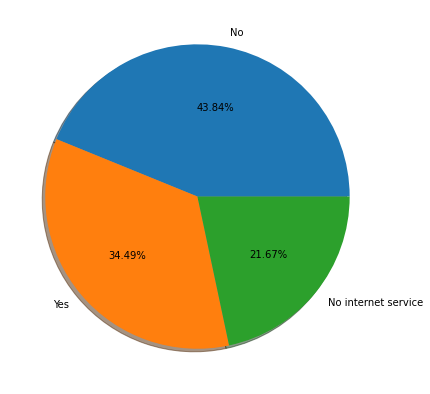

In [22]:
labels='No','Yes','No internet service'
plt.figure(figsize=(7,7))
plt.pie(df['OnlineBackup'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the customer is not using online backup

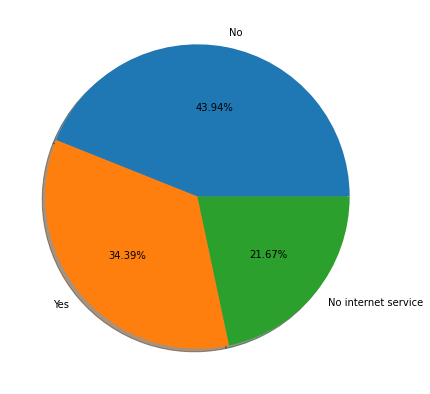

In [23]:
labels='No','Yes','No internet service'
plt.figure(figsize=(7,7))
plt.pie(df['DeviceProtection'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the customer not using Device Protection

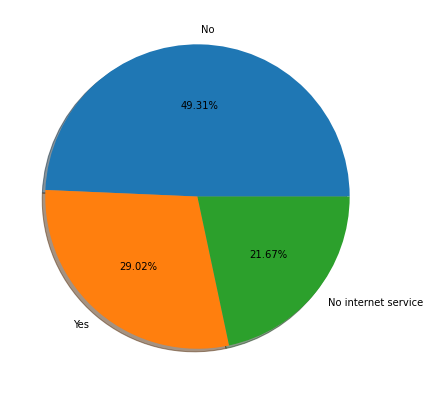

In [24]:
labels='No','Yes','No internet service'
plt.figure(figsize=(7,7))
plt.pie(df['TechSupport'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the customer is not using tech support

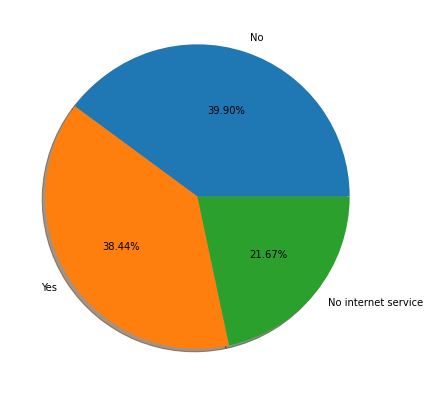

In [25]:
labels='No','Yes','No internet service'
plt.figure(figsize=(7,7))
plt.pie(df['StreamingTV'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the customer is using Streaming TV 

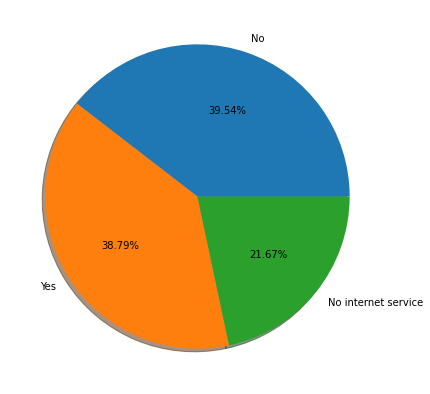

In [26]:
labels='No','Yes','No internet service'
plt.figure(figsize=(7,7))
plt.pie(df['StreamingMovies'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- It is similar ratio that most of them uses Streaming movies and not using it.

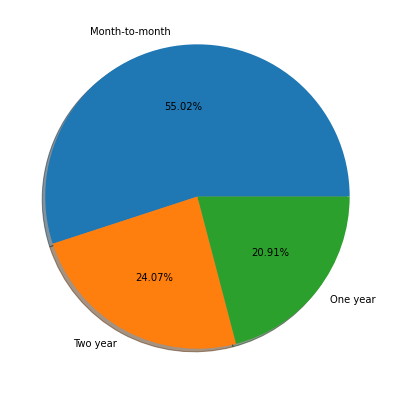

In [27]:
labels='Month-to-month','Two year','One year'
plt.figure(figsize=(7,7))
plt.pie(df['Contract'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Observation:- Most of the customer uses month-to-month contract

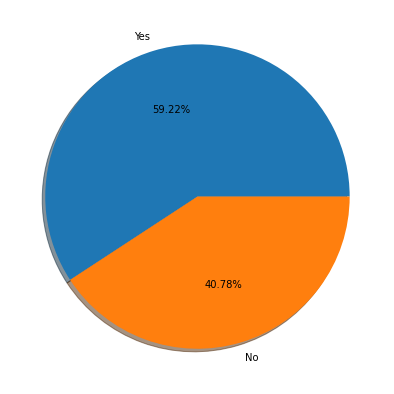

In [28]:
labels='Yes','No'
plt.figure(figsize=(7,7))
plt.pie(df['PaperlessBilling'].value_counts(),autopct='%.2f%%',labels=labels,shadow=True)
plt.show()

### Most of the user using paperless billing

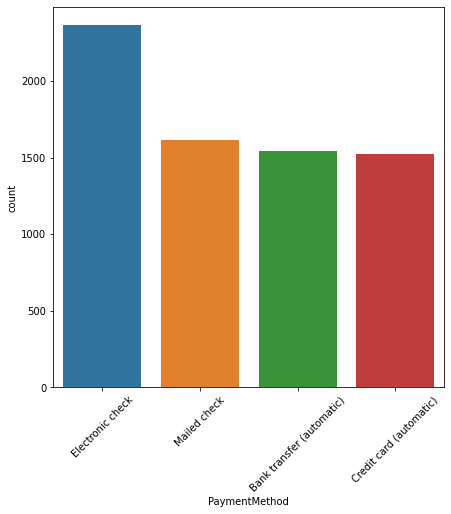

In [29]:

plt.figure(figsize=(7,7))
sns.countplot(df['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

### Observation:- Most of the customer using Electronic check for the payment

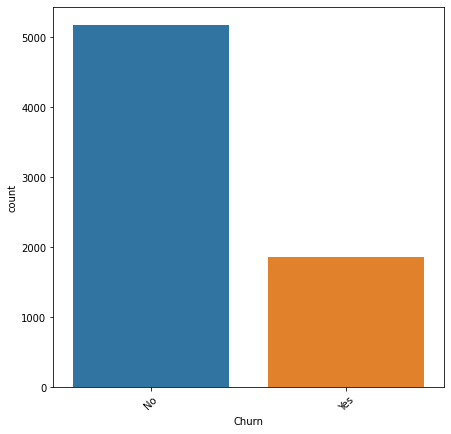

In [30]:
plt.figure(figsize=(7,7))
sns.countplot(df['Churn'])
plt.xticks(rotation=45)
plt.show()

### Observation:- The churn rate is low as compared to yes

In [31]:
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [32]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [33]:
df['TotalCharges'].isna().sum()

11

In [34]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [35]:
### Filling missing Value
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


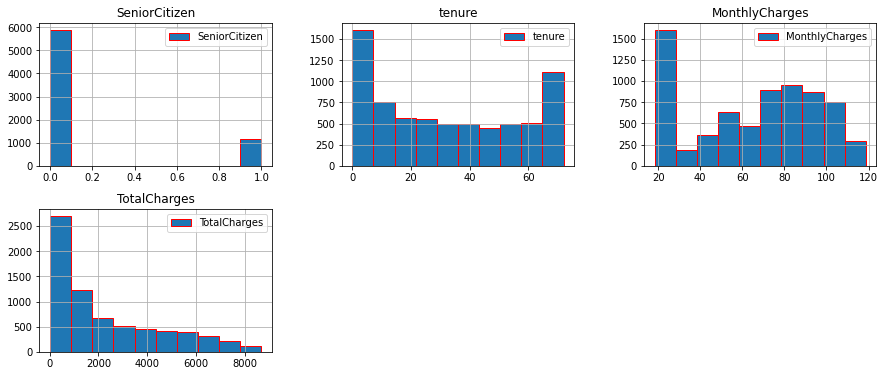

In [37]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),legend=True)
plt.show()


### Observation:-

1. The senior citizen frequency is data is less.

2. Tenure mode lies between 0 to 10 and again high after 65 it increases.

3. The Monthly charges high between 20 to 30. 

4. Total Charges for maximum user is between 0 to 1000

In [38]:
df2=df[['tenure','Churn','Contract']]

In [39]:
df2

,tenure,Churn,Contract
0,1,No,Month-to-month
1,34,No,One year
2,2,Yes,Month-to-month
3,45,No,One year
4,2,Yes,Month-to-month
...,...,...,...
7038,24,No,One year
7039,72,No,One year
7040,11,No,Month-to-month
7041,4,Yes,Month-to-month


In [40]:
df2=df2.pivot_table(values='tenure',columns='Churn',index='Contract')

In [41]:
df2

Churn,No,Yes
Contract,,
Month-to-month,21.033333,14.016918
One year,41.674063,44.963855
Two year,56.602914,61.270833


<AxesSubplot:xlabel='Contract'>

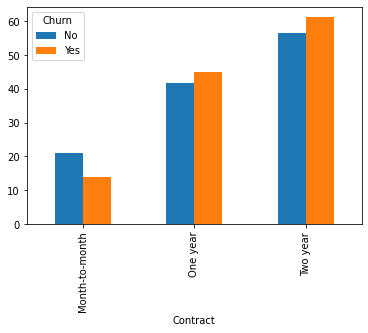

In [42]:

df2.plot.bar()

### Observation:- As the number of year in contract increases the churn ratio is high .

In [43]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
df3=df[['TotalCharges','Churn','PhoneService']]
df3

,TotalCharges,Churn,PhoneService
0,29.85,No,No
1,1889.50,No,Yes
2,108.15,Yes,Yes
3,1840.75,No,No
4,151.65,Yes,Yes
...,...,...,...
7038,1990.50,No,Yes
7039,7362.90,No,Yes
7040,346.45,No,No
7041,306.60,Yes,Yes


In [45]:
df3=df3.pivot_table(values='TotalCharges',columns='Churn',index='PhoneService')
df3

Churn,No,Yes
PhoneService,,
No,1773.548049,687.087941
Yes,2640.562313,1616.316627


<AxesSubplot:xlabel='PhoneService'>

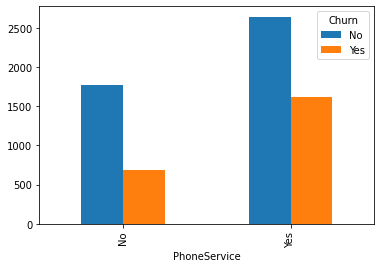

In [46]:
df3.plot.bar()

In [47]:
cr=pd.crosstab(index=df['gender'],columns=df['Churn'])
cr

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


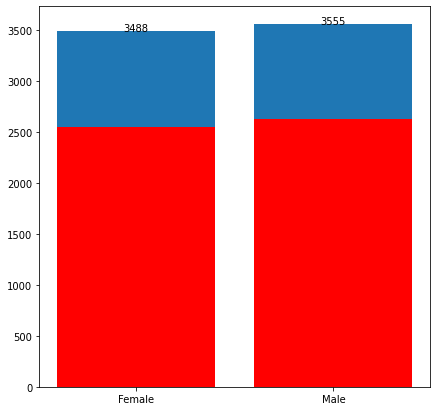

In [48]:
plt.figure(figsize=(7,7))
plt.bar(cr.index,cr.No,color='red')
plt.bar(cr.index,cr.Yes,bottom=cr.No)

for i,val in enumerate(cr.index):
    y=cr.loc[val].sum()
    x=i
    
    plt.text(x,y,str(y),ha='center')
    

In [49]:
cr=pd.crosstab(index=df['SeniorCitizen'],columns=df['Churn'])
cr

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


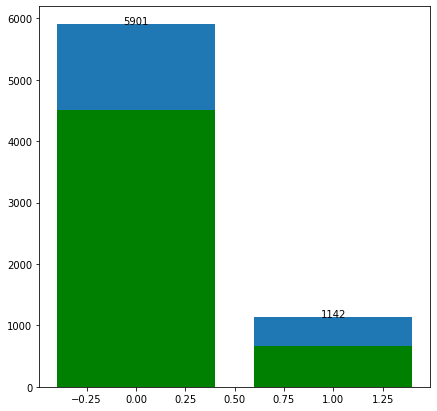

In [50]:
plt.figure(figsize=(7,7))
plt.bar(cr.index,cr.No,color='green')
plt.bar(cr.index,cr.Yes,bottom=cr.No)

for i,val in enumerate(cr.index):
    y=cr.loc[val].sum()

    x=i
    
    plt.text(x,y,str(y),ha='center')
    

### Observation:- for senior citizen the churn is high 

In [51]:
cr=pd.crosstab(index=df['Partner'],columns=df['Churn'])
cr

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


<AxesSubplot:xlabel='Partner', ylabel='Yes'>

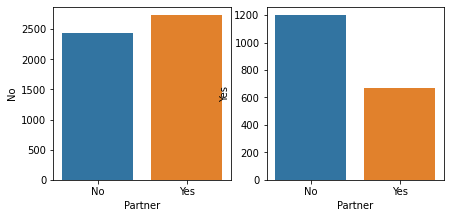

In [52]:
sns.set_style()
plt.figure(figsize=(7,7))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


    
    
    
    

### Observation:- Clearly the churn of customer who not partner is more.

In [53]:
cr=pd.crosstab(index=df['Dependents'],columns=df['Churn'])
cr

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


<AxesSubplot:xlabel='Dependents', ylabel='Yes'>

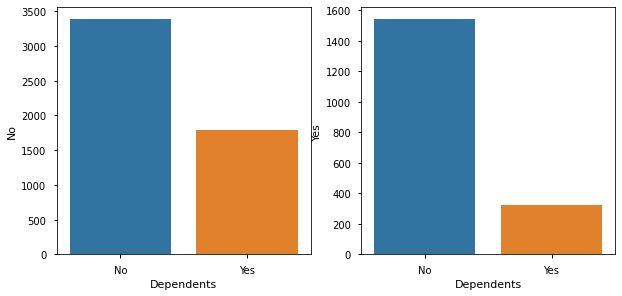

In [54]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


    

### Observation:- Those who dont have dependents the churn rate is high

In [55]:
cr=pd.crosstab(index=df['PhoneService'],columns=df['Churn'])
cr

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


<AxesSubplot:xlabel='PhoneService', ylabel='Yes'>

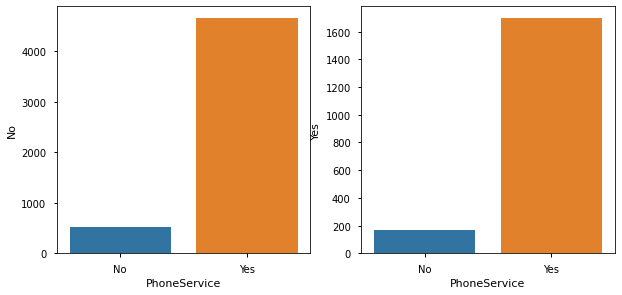

In [56]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)



### Observation:- Most of the customer uses phone service and the ratio is almost same for those who are not using

In [57]:
cr=pd.crosstab(index=df['MultipleLines'],columns=df['Churn'])
cr

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


<AxesSubplot:xlabel='MultipleLines', ylabel='Yes'>

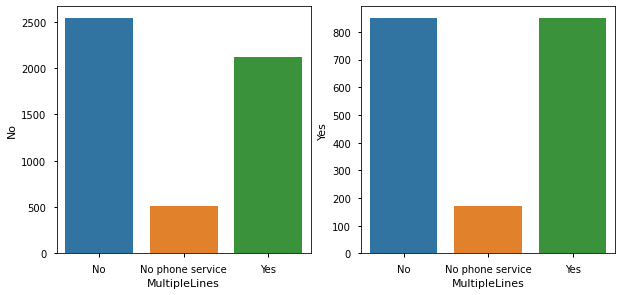

In [58]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)







### Observation:- Those who are using multiple line the churn rate is also high

In [59]:
cr=pd.crosstab(index=df['InternetService'],columns=df['Churn'])
cr

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<AxesSubplot:xlabel='InternetService', ylabel='Yes'>

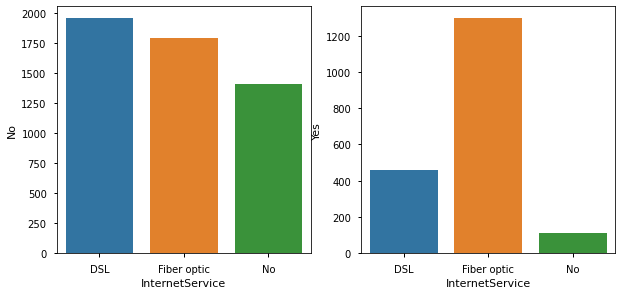

In [60]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)




### Observation:- The customer with fiber optic has high rate of churn

In [61]:
cr=pd.crosstab(index=df['OnlineSecurity'],columns=df['Churn'])
cr

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


<AxesSubplot:xlabel='OnlineSecurity', ylabel='Yes'>

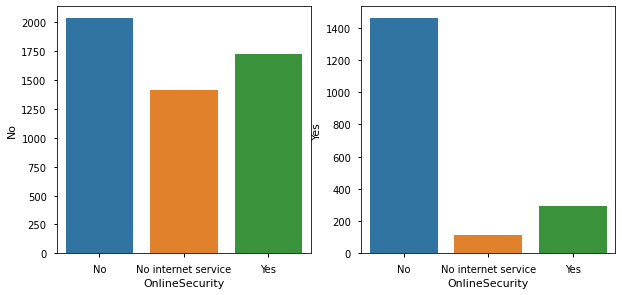

In [62]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- The customer who is not using the online security having high churn rate

In [63]:
cr=pd.crosstab(index=df['OnlineBackup'],columns=df['Churn'])
cr

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


<AxesSubplot:xlabel='OnlineBackup', ylabel='Yes'>

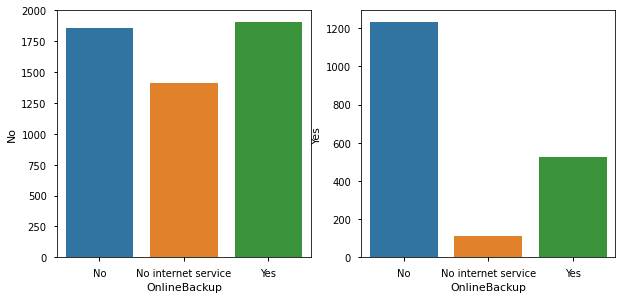

In [64]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- The churn rate is high for those customer who is not using online backup

In [65]:
cr=pd.crosstab(index=df['DeviceProtection'],columns=df['Churn'])
cr

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


<AxesSubplot:xlabel='DeviceProtection', ylabel='Yes'>

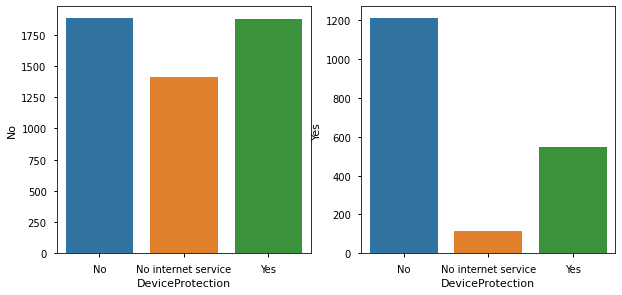

In [66]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- Those who dont uses device protection the churn rate is also high

In [67]:
cr=pd.crosstab(index=df['TechSupport'],columns=df['Churn'])
cr

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


<AxesSubplot:xlabel='TechSupport', ylabel='Yes'>

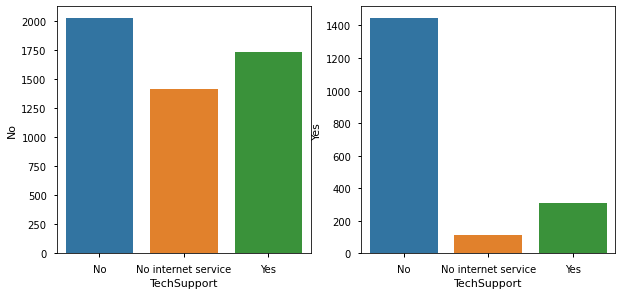

In [68]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- Those who are not using Tech support has higher chance of churn

In [69]:
cr=pd.crosstab(index=df['StreamingTV'],columns=df['Churn'])
cr

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


<AxesSubplot:xlabel='StreamingTV', ylabel='Yes'>

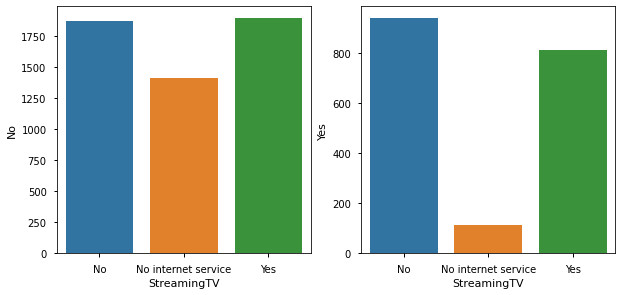

In [70]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


In [71]:
cr=pd.crosstab(index=df['StreamingMovies'],columns=df['Churn'])
cr

Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


<AxesSubplot:xlabel='StreamingMovies', ylabel='Yes'>

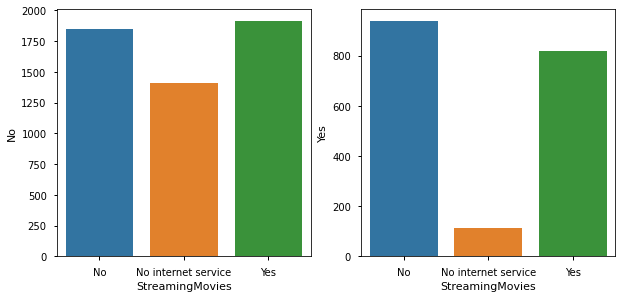

In [72]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- Those who are not streaming movies and TV has higher churn rate

In [73]:
cr=pd.crosstab(index=df['Contract'],columns=df['Churn'])
cr

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


<AxesSubplot:xlabel='Contract', ylabel='Yes'>

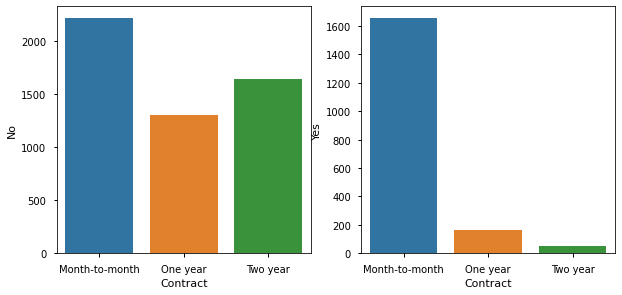

In [74]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- Month to month contract user has higher churn rate

In [75]:
cr=pd.crosstab(index=df['PaperlessBilling'],columns=df['Churn'])
cr

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


<AxesSubplot:xlabel='PaperlessBilling', ylabel='Yes'>

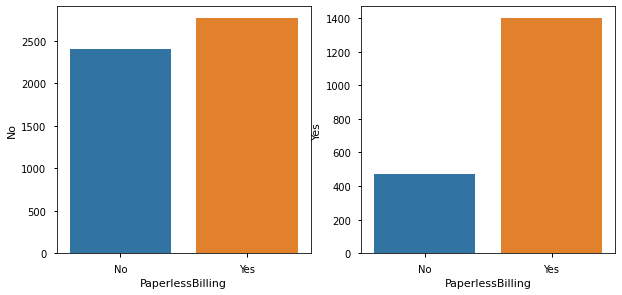

In [76]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)


### Observation:- Those who using paperless billing has higher churn rate

In [77]:
cr=pd.crosstab(index=df['PaymentMethod'],columns=df['Churn'])
cr

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

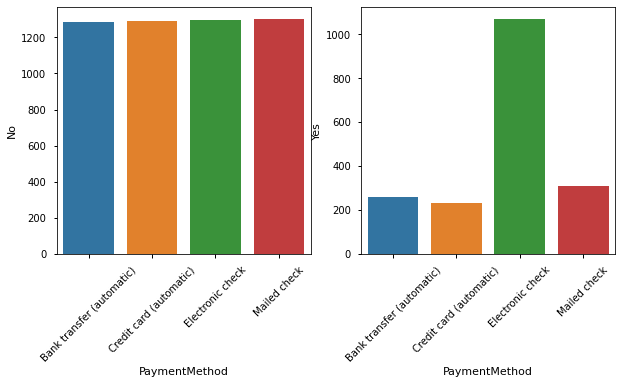

In [78]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,2,1)
sns.barplot(x=cr.index,y=cr.No)
plt.xticks(rotation=45)



ax=plt.subplot(2,2,2)
sns.barplot(x=cr.index,y=cr.Yes)
plt.xticks(rotation=45)



### Observation:- Electronic check payment method has high churn rate

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

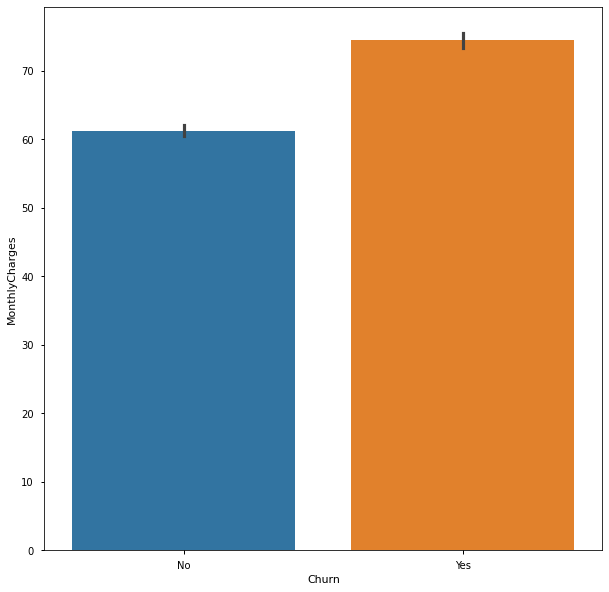

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(x='Churn',y='MonthlyCharges',data=df)


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

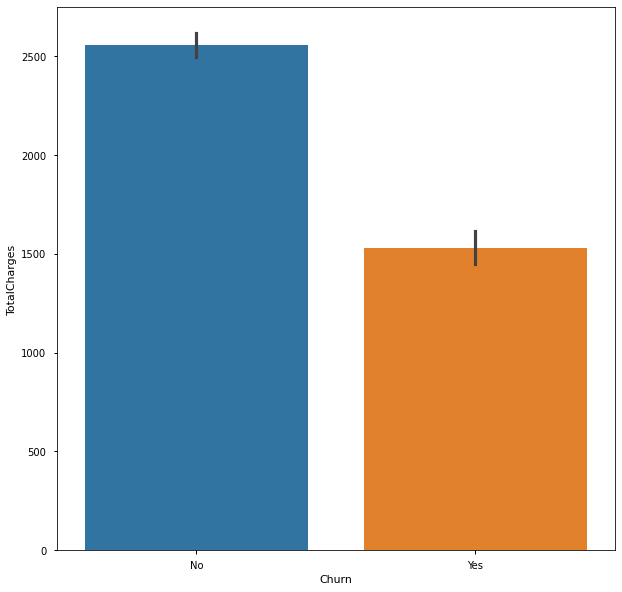

In [80]:
plt.figure(figsize=(10,10))
sns.barplot(x='Churn',y='TotalCharges',data=df)


### Observation:- As Monthly charges increases the churn rate increases but Totalcharges is opposite as it increase the churn rate decreases

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

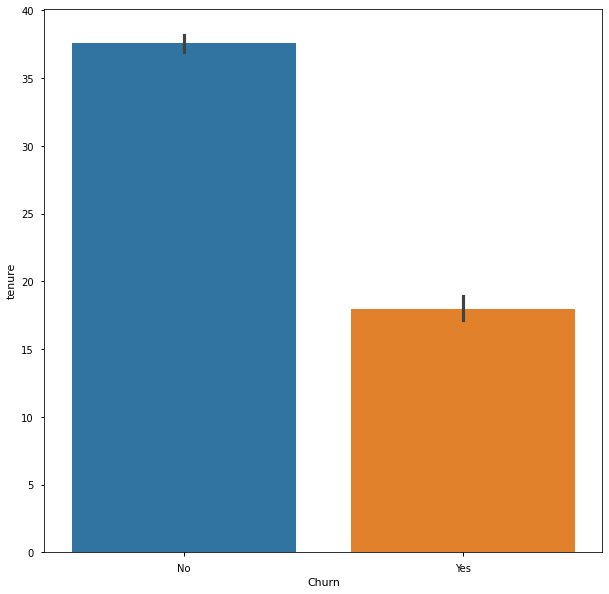

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(x='Churn',y='tenure',data=df)


### Observation:- On increaase of tensure the churn rate decreases..

In [82]:
# Feature Engineering
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [84]:
cat=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
        
print(cat)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cat]=df[cat].apply(le.fit_transform)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [87]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,45.70,45.70,1
1338,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.15,20.15,1
1491,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,19.55,19.55,0
1739,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,69.90,1
1932,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,20.20,0
2713,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,20.45,20.45,0
2892,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.45,20.45,0
3301,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.60,69.60,1
3754,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.05,20.05,0
4098,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,20.20,20.20,1


In [88]:
df.duplicated().sum()

22

In [89]:
df.drop_duplicates(keep="first",inplace=True)

In [90]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [91]:
df.shape

(7021, 20)

<AxesSubplot:>

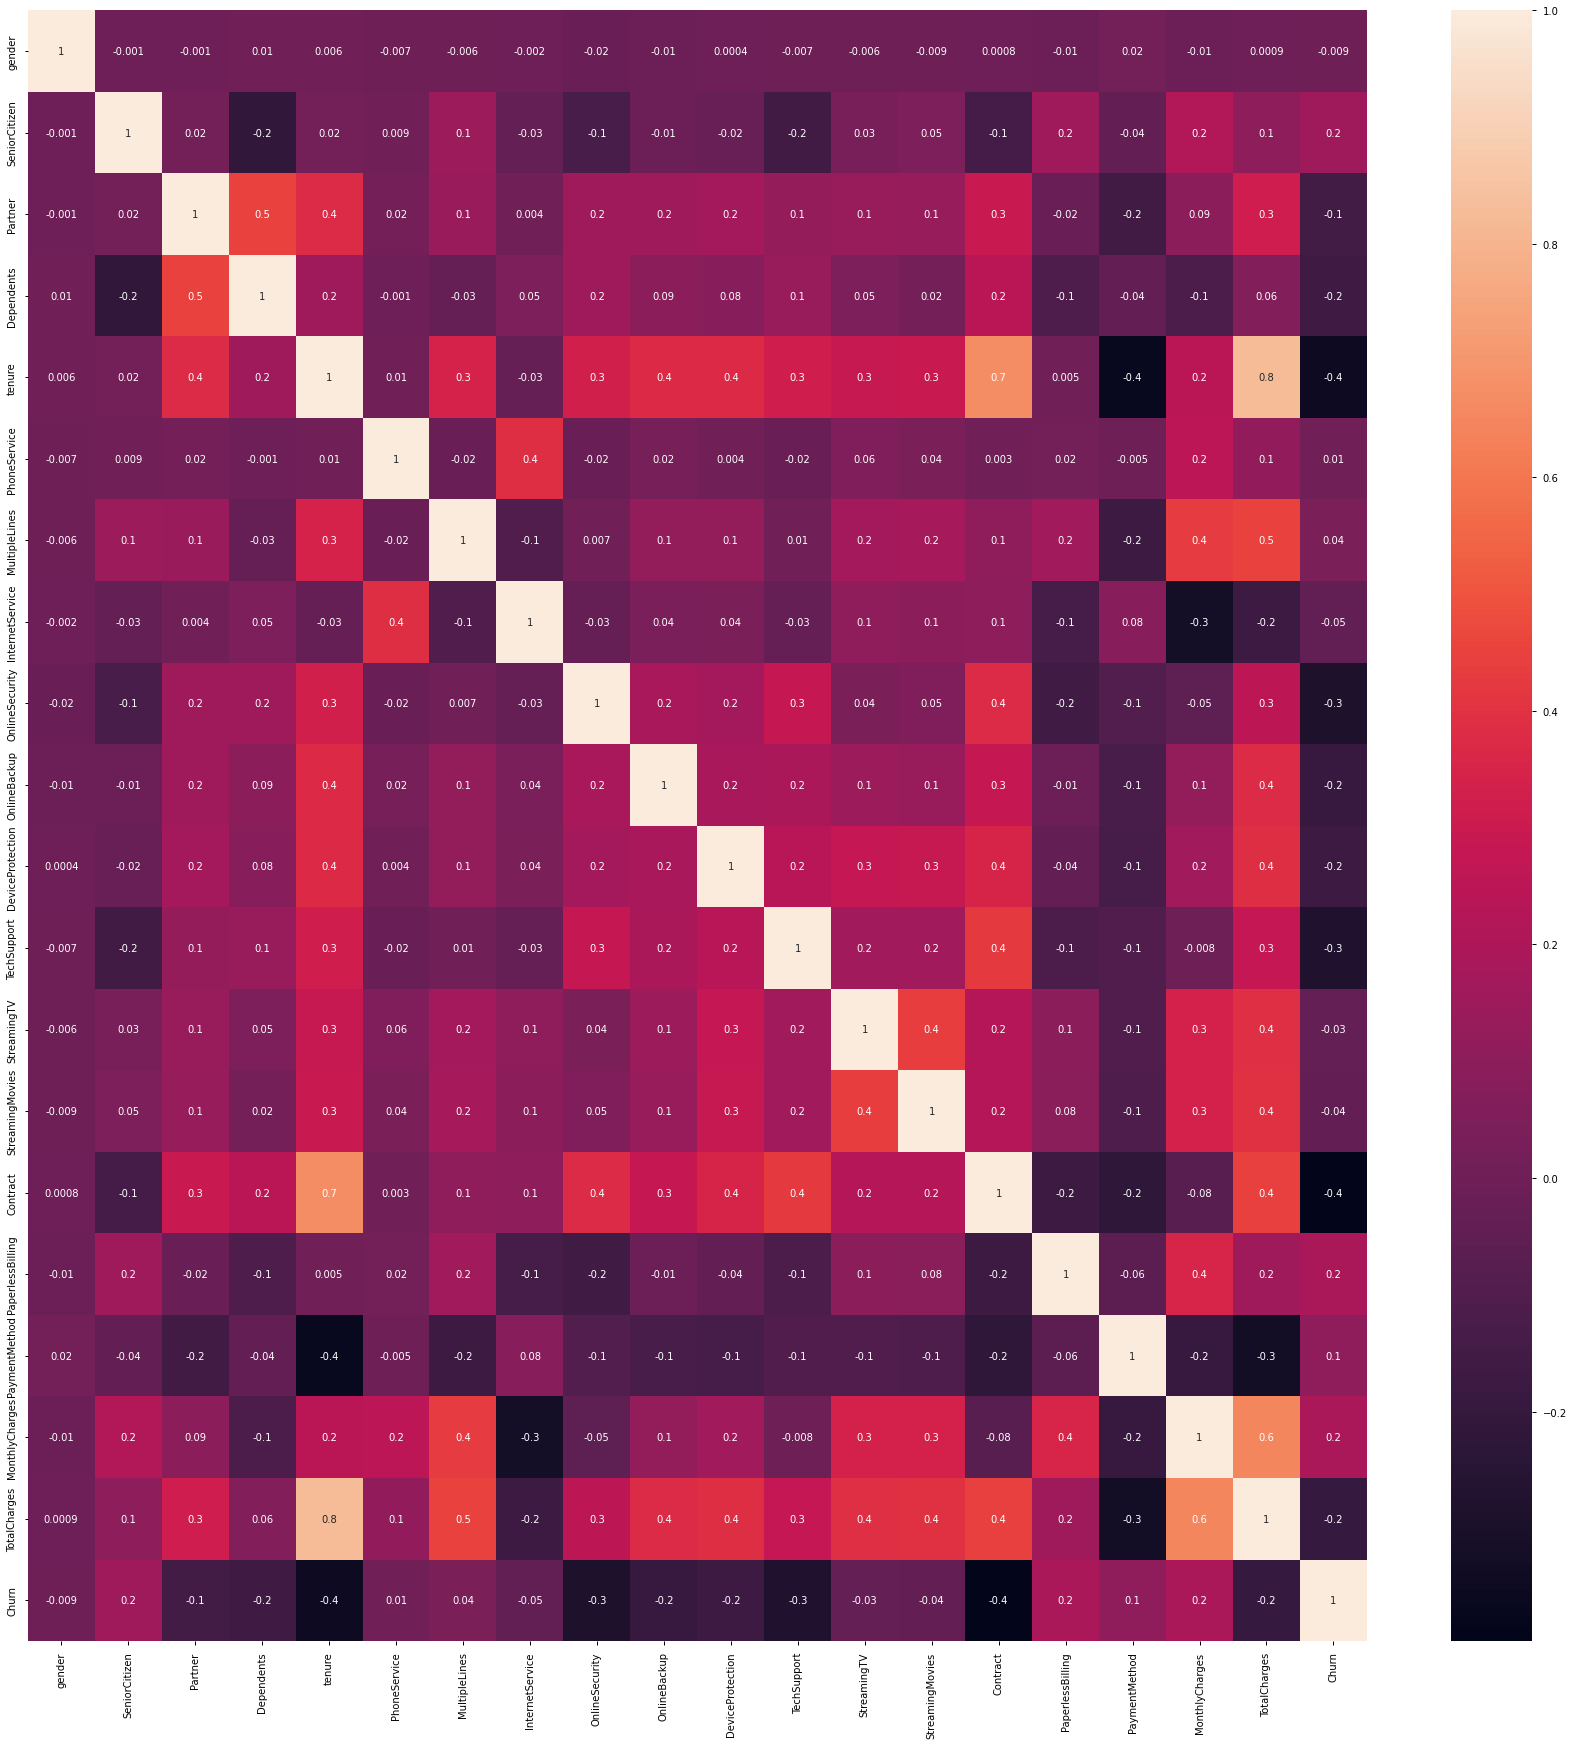

In [92]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},fmt='.1g')


# Observation:- Some features having multicolinearity problem

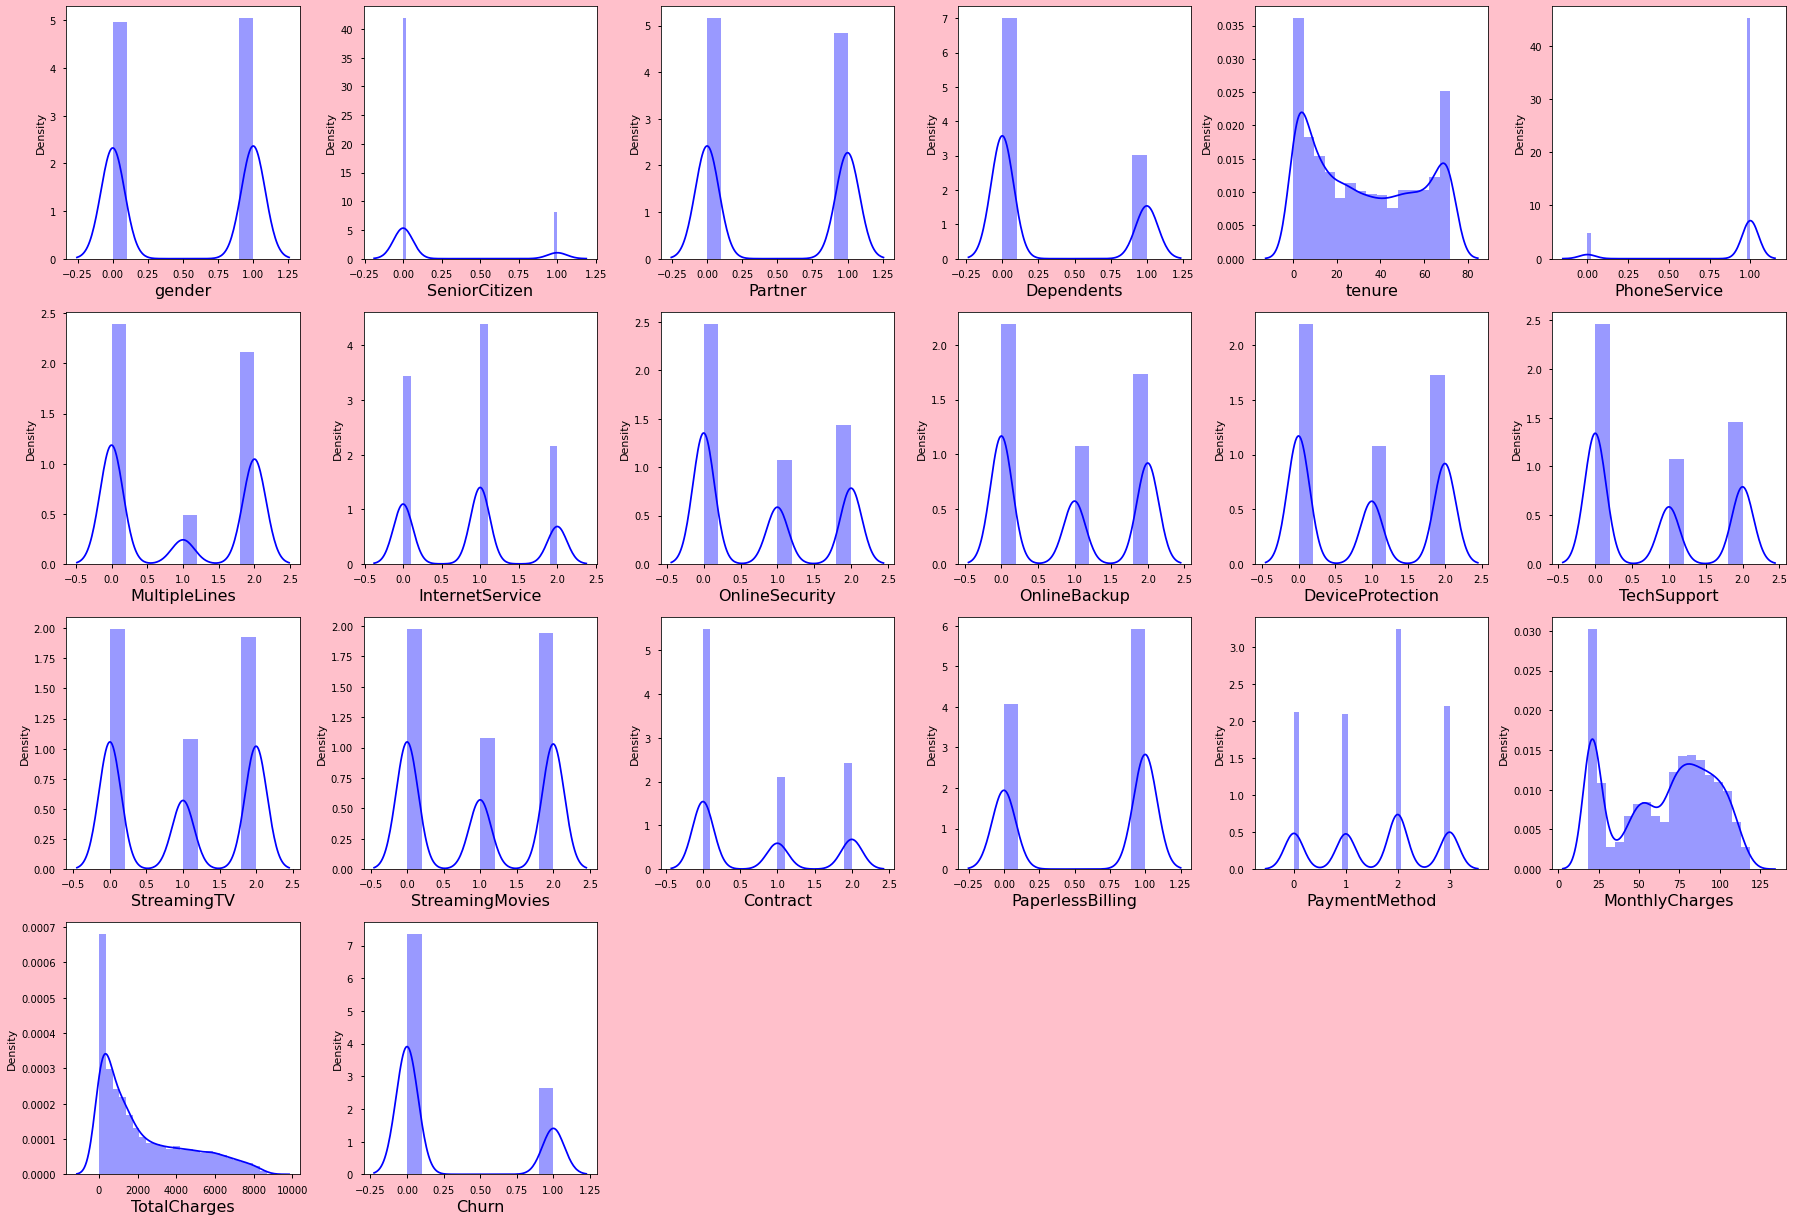

In [93]:
plt.figure(figsize=(25,25),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- Tennure, MonthlyCharges and Totalcharges having skewness

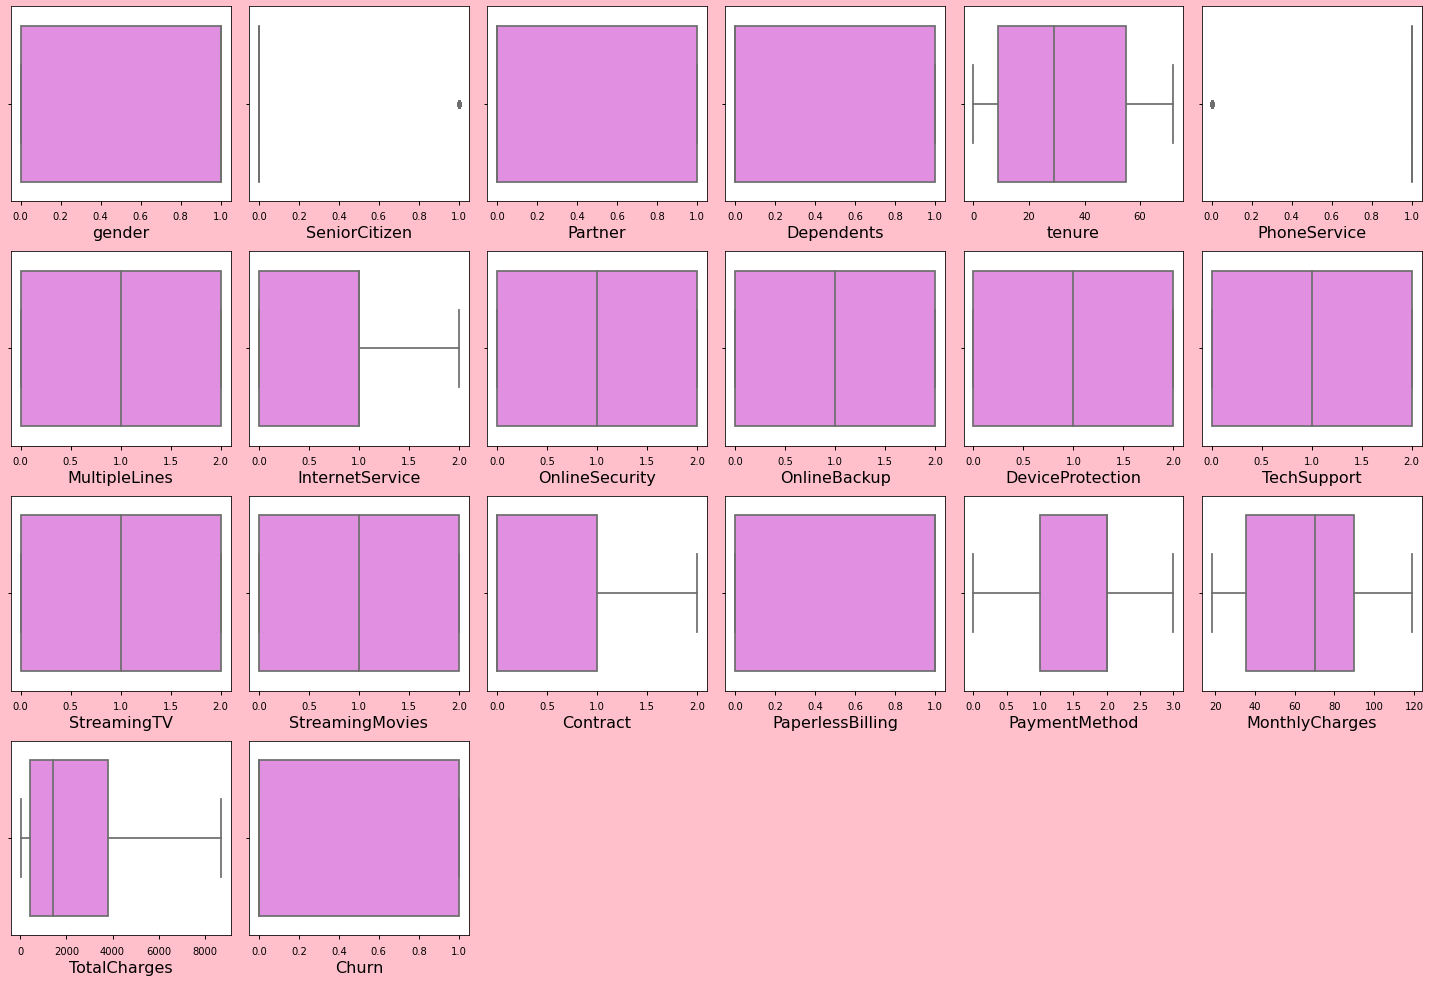

In [94]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],color='violet')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


# Observation:- Since data is skewed but no outliers detected. So we will treat one by one.

In [95]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959088
Churn               1.068139
dtype: float64

<Figure size 1800x1800 with 0 Axes>

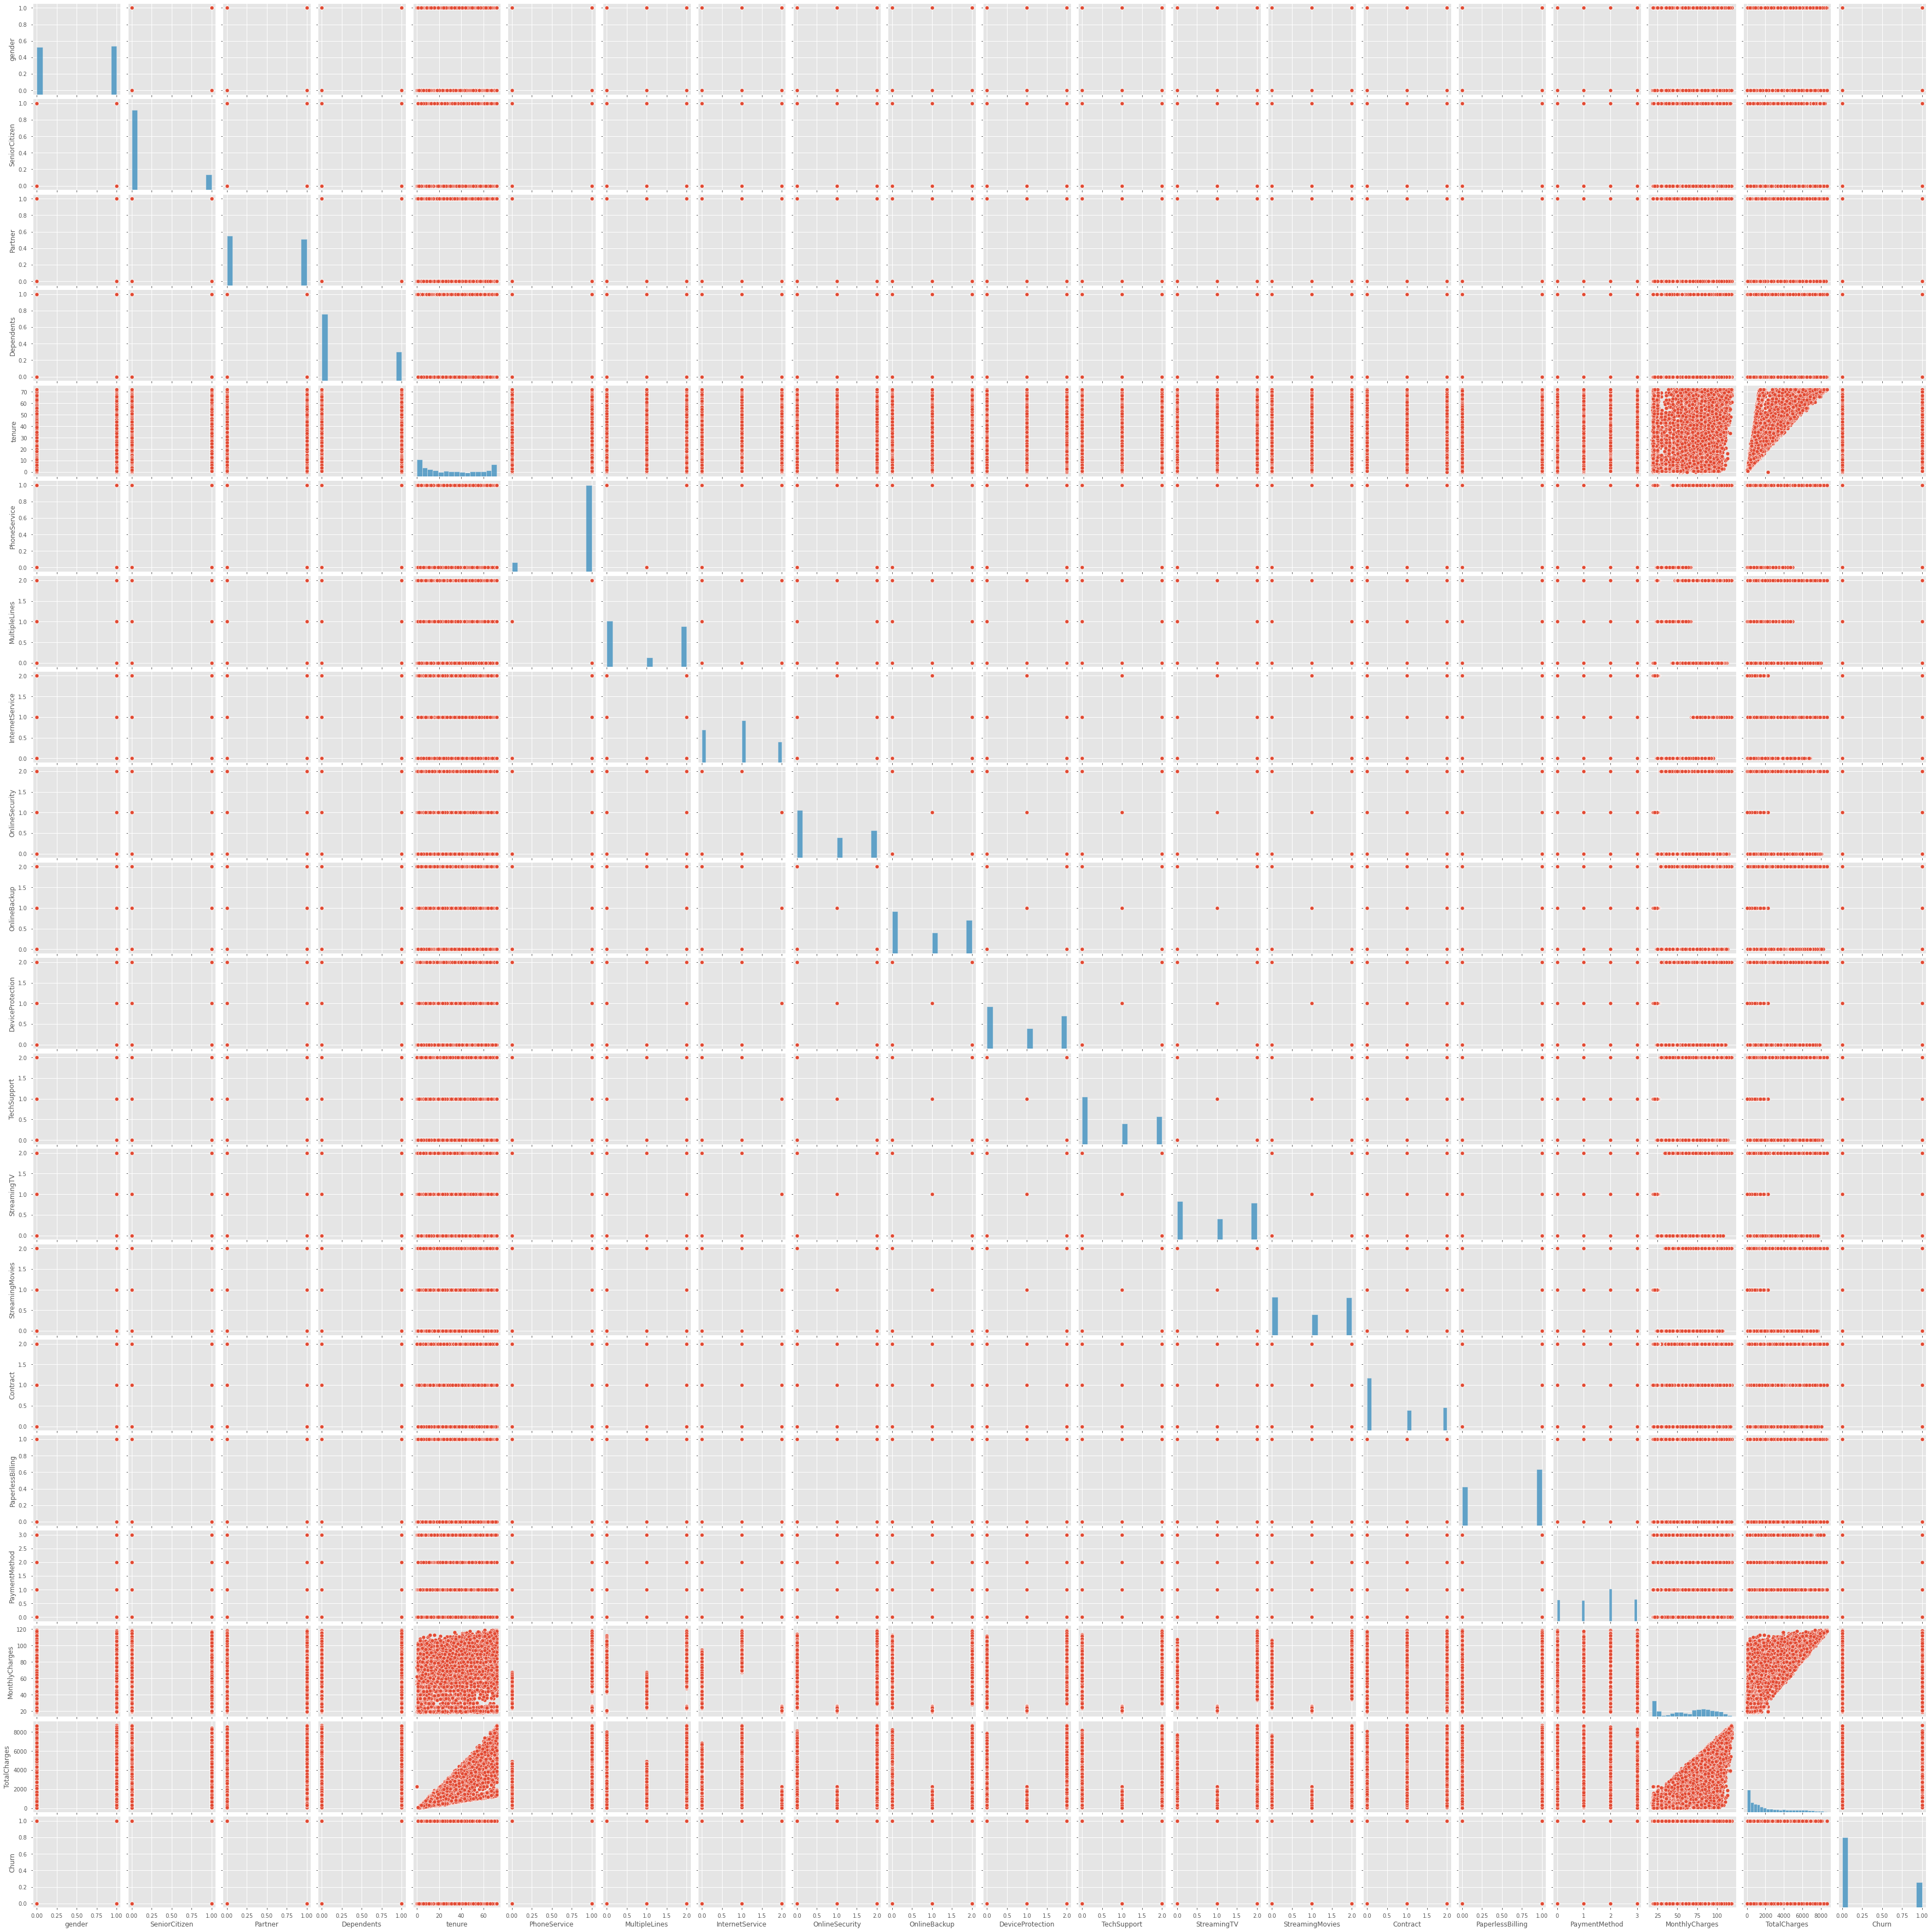

In [96]:
plt.style.use('ggplot')
plt.figure(figsize=(25,25))
sns.pairplot(df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

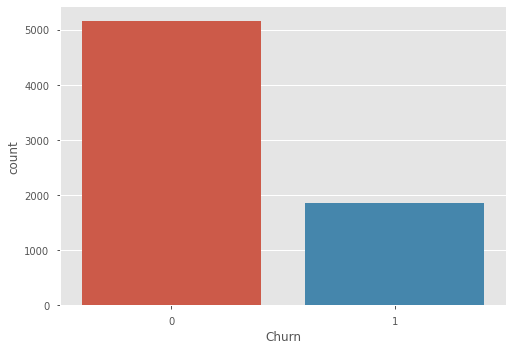

In [97]:
sns.countplot(df.Churn)

In [105]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()


## Observation:- Clearly the sample is imbalanced so we to balance first

In [106]:
X=df.drop('Churn',axis=1)
y=df.Churn


In [107]:
X.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [108]:
y.dtypes

dtype('int64')

In [109]:
X,y=sm.fit_resample(X,y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

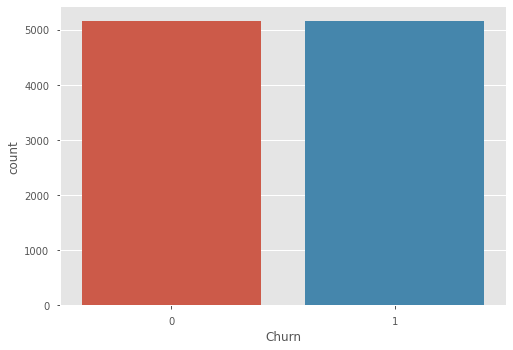

In [111]:
sns.countplot(y)

In [112]:
y.shape

(10328,)

In [113]:
X.shape

(10328, 19)

<AxesSubplot:title={'center':'Correlation with Target'}>

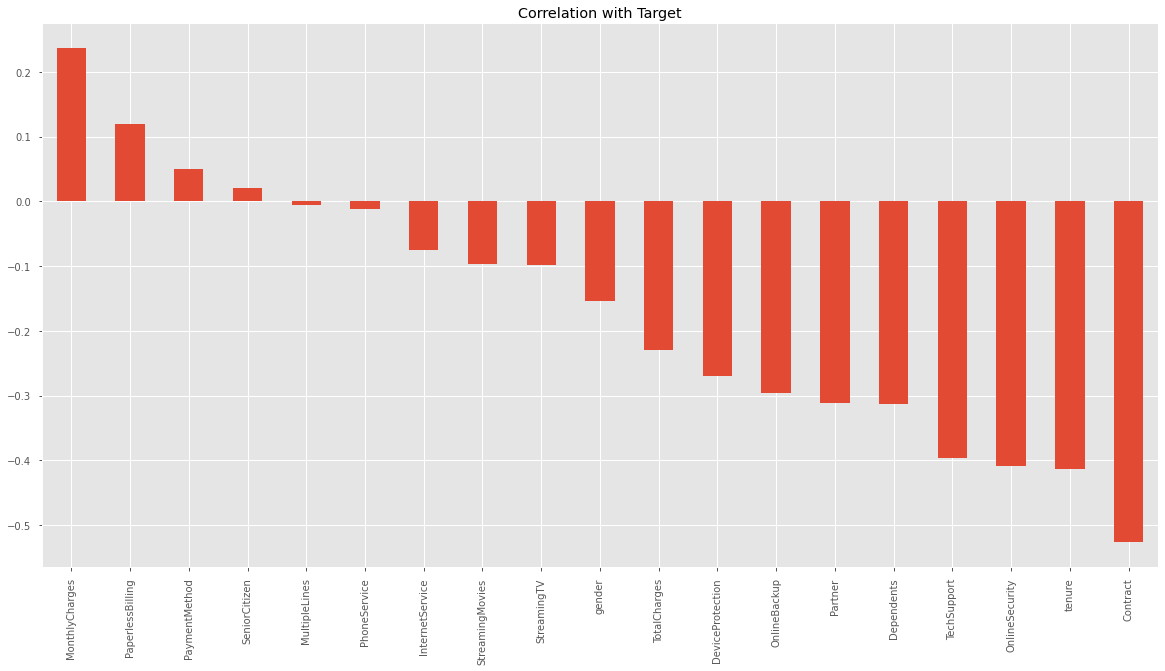

In [114]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


### Observation:- Most of the features are negatively correleted.

In [115]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
scaler=StandardScaler()

In [117]:
x_scaled=scaler.fit_transform(X)

In [118]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif

,vif,features
0,1.022897,gender
1,1.091300,SeniorCitizen
2,1.542007,Partner
3,1.428689,Dependents
4,8.371725,tenure
5,1.669033,PhoneService
6,1.396016,MultipleLines
7,1.682516,InternetService
8,1.366945,OnlineSecurity
9,1.294980,OnlineBackup


### Observation:- Since Total charges and tenure has vif > 5 so dropping these two columns

In [119]:
x=pd.DataFrame(x_scaled,columns=X.columns)

In [120]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.869405,-0.396647,1.281711,-0.525514,-1.118970,-2.958479,0.090672,-1.243054,-0.756949,1.455385,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,0.447788,-1.334924,-0.930012
1,1.150212,-0.396647,-0.780207,-0.525514,0.260523,0.338012,-0.988204,-1.243054,1.724883,-0.887386,1.439894,-0.768882,-1.034175,-1.046488,0.669624,-1.212527,1.449685,-0.389732,-0.077098
2,1.150212,-0.396647,-0.780207,-0.525514,-1.077167,0.338012,-0.988204,-1.243054,1.724883,1.455385,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,1.449685,-0.497853,-0.894100
3,1.150212,-0.396647,-0.780207,-0.525514,0.720354,-2.958479,0.090672,-1.243054,1.724883,-0.887386,1.439894,1.701876,-1.034175,-1.046488,0.669624,-1.212527,-1.556006,-0.900694,-0.099457
4,-0.869405,-0.396647,-0.780207,-0.525514,-1.077167,0.338012,-0.988204,0.234476,-0.756949,-0.887386,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,0.447788,0.089840,-0.874149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,-0.869405,-0.396647,-0.780207,-0.525514,1.221988,0.338012,1.169549,0.234476,0.483967,0.284000,-0.897246,-0.768882,-1.034175,1.211792,-0.641194,0.824724,-1.556006,0.884079,1.549319
10324,-0.869405,-0.396647,1.281711,1.902900,0.469537,0.338012,-0.988204,-1.243054,-0.756949,0.284000,-0.897246,0.466497,-1.034175,1.211792,-0.641194,-1.212527,-1.556006,0.083291,0.309350
10325,-0.869405,-0.396647,-0.780207,-0.525514,-1.118970,0.338012,-0.988204,-1.243054,-0.756949,-0.887386,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,-1.212527,1.449685,-0.767753,-0.922553
10326,-0.869405,-0.396647,-0.780207,-0.525514,-0.659139,-2.958479,0.090672,-1.243054,-0.756949,-0.887386,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,0.447788,-1.435144,-0.806074


In [121]:
x.drop(columns=['tenure','TotalCharges'],axis=1,inplace=True)

In [122]:
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-0.869405,-0.396647,1.281711,-0.525514,-2.958479,0.090672,-1.243054,-0.756949,1.455385,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,0.447788,-1.334924
1,1.150212,-0.396647,-0.780207,-0.525514,0.338012,-0.988204,-1.243054,1.724883,-0.887386,1.439894,-0.768882,-1.034175,-1.046488,0.669624,-1.212527,1.449685,-0.389732
2,1.150212,-0.396647,-0.780207,-0.525514,0.338012,-0.988204,-1.243054,1.724883,1.455385,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,1.449685,-0.497853
3,1.150212,-0.396647,-0.780207,-0.525514,-2.958479,0.090672,-1.243054,1.724883,-0.887386,1.439894,1.701876,-1.034175,-1.046488,0.669624,-1.212527,-1.556006,-0.900694
4,-0.869405,-0.396647,-0.780207,-0.525514,0.338012,-0.988204,0.234476,-0.756949,-0.887386,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,0.447788,0.089840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,-0.869405,-0.396647,-0.780207,-0.525514,0.338012,1.169549,0.234476,0.483967,0.284000,-0.897246,-0.768882,-1.034175,1.211792,-0.641194,0.824724,-1.556006,0.884079
10324,-0.869405,-0.396647,1.281711,1.902900,0.338012,-0.988204,-1.243054,-0.756949,0.284000,-0.897246,0.466497,-1.034175,1.211792,-0.641194,-1.212527,-1.556006,0.083291
10325,-0.869405,-0.396647,-0.780207,-0.525514,0.338012,-0.988204,-1.243054,-0.756949,-0.887386,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,-1.212527,1.449685,-0.767753
10326,-0.869405,-0.396647,-0.780207,-0.525514,-2.958479,0.090672,-1.243054,-0.756949,-0.887386,-0.897246,-0.768882,-1.034175,-1.046488,-0.641194,0.824724,0.447788,-1.435144


In [123]:
## Model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve


In [124]:
# Logistic Regression
lr=LogisticRegression()


In [126]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    if round(accuracy_score(y_train,ypred)*100)==round(accuracy_score(y_test,y_pred)*100):
        print('At random state',i,'model performs well')
        print('At random state ',i)
        print(round(accuracy_score(y_test,y_pred)*100))


At random state 1 model performs well
At random state  1
80
At random state 4 model performs well
At random state  4
80
At random state 6 model performs well
At random state  6
80
At random state 7 model performs well
At random state  7
80
At random state 8 model performs well
At random state  8
80
At random state 9 model performs well
At random state  9
80
At random state 10 model performs well
At random state  10
80
At random state 11 model performs well
At random state  11
80
At random state 12 model performs well
At random state  12
80
At random state 13 model performs well
At random state  13
80
At random state 14 model performs well
At random state  14
80
At random state 16 model performs well
At random state  16
80
At random state 18 model performs well
At random state  18
80
At random state 20 model performs well
At random state  20
80
At random state 21 model performs well
At random state  21
80
At random state 22 model performs well
At random state  22
80
At random state 23 m

At random state 215 model performs well
At random state  215
80
At random state 219 model performs well
At random state  219
80
At random state 221 model performs well
At random state  221
80
At random state 223 model performs well
At random state  223
80
At random state 224 model performs well
At random state  224
80
At random state 226 model performs well
At random state  226
80
At random state 227 model performs well
At random state  227
80
At random state 228 model performs well
At random state  228
80
At random state 229 model performs well
At random state  229
80
At random state 230 model performs well
At random state  230
80
At random state 231 model performs well
At random state  231
80
At random state 233 model performs well
At random state  233
80
At random state 235 model performs well
At random state  235
80
At random state 236 model performs well
At random state  236
80
At random state 237 model performs well
At random state  237
80
At random state 239 model performs well


At random state 470 model performs well
At random state  470
80
At random state 472 model performs well
At random state  472
80
At random state 473 model performs well
At random state  473
80
At random state 474 model performs well
At random state  474
80
At random state 475 model performs well
At random state  475
80
At random state 477 model performs well
At random state  477
80
At random state 478 model performs well
At random state  478
80
At random state 479 model performs well
At random state  479
80
At random state 482 model performs well
At random state  482
80
At random state 488 model performs well
At random state  488
80
At random state 489 model performs well
At random state  489
80
At random state 490 model performs well
At random state  490
80
At random state 491 model performs well
At random state  491
80
At random state 493 model performs well
At random state  493
80
At random state 495 model performs well
At random state  495
80
At random state 496 model performs well


At random state 719 model performs well
At random state  719
80
At random state 720 model performs well
At random state  720
80
At random state 721 model performs well
At random state  721
80
At random state 722 model performs well
At random state  722
80
At random state 723 model performs well
At random state  723
80
At random state 726 model performs well
At random state  726
80
At random state 729 model performs well
At random state  729
80
At random state 735 model performs well
At random state  735
80
At random state 736 model performs well
At random state  736
80
At random state 737 model performs well
At random state  737
80
At random state 738 model performs well
At random state  738
80
At random state 741 model performs well
At random state  741
80
At random state 742 model performs well
At random state  742
80
At random state 744 model performs well
At random state  744
80
At random state 745 model performs well
At random state  745
80
At random state 746 model performs well


At random state 964 model performs well
At random state  964
80
At random state 967 model performs well
At random state  967
80
At random state 968 model performs well
At random state  968
80
At random state 969 model performs well
At random state  969
80
At random state 971 model performs well
At random state  971
80
At random state 976 model performs well
At random state  976
80
At random state 979 model performs well
At random state  979
80
At random state 980 model performs well
At random state  980
80
At random state 981 model performs well
At random state  981
80
At random state 983 model performs well
At random state  983
80
At random state 984 model performs well
At random state  984
80
At random state 985 model performs well
At random state  985
80
At random state 986 model performs well
At random state  986
80
At random state 988 model performs well
At random state  988
80
At random state 989 model performs well
At random state  989
80
At random state 990 model performs well


<AxesSubplot:>

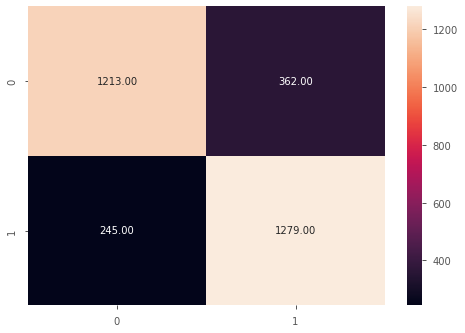

In [127]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')


In [128]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1575
           1       0.78      0.84      0.81      1524

    accuracy                           0.80      3099
   macro avg       0.81      0.80      0.80      3099
weighted avg       0.81      0.80      0.80      3099



In [129]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5).mean()


0.7916411683218909

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=327)


In [135]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print(accuracy_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print(accuracy_score(y_test,y_pred)*100)
        print(classification_report(y_test,y_pred))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')
        print('*'*100)
        print('cross_val_score',cross_val_score(clf,x,y,cv=5).mean())
        


# KNN

In [136]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [137]:
model(knn,x_train,x_test,y_train,y_test,train=True)

84.36851570065016


77.86382704098096
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1577
           1       0.74      0.84      0.79      1522

    accuracy                           0.78      3099
   macro avg       0.78      0.78      0.78      3099
weighted avg       0.78      0.78      0.78      3099

****************************************************************************************************
cross_val_score 0.776053432842118


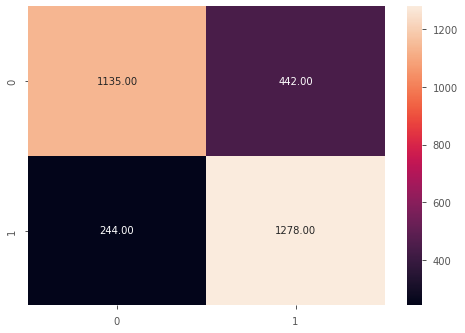

In [138]:
model(knn,x_train,x_test,y_train,y_test,train=False)

# Decision Tree

In [139]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [140]:
model(dt,x_train,x_test,y_train,y_test,train=True)

99.62650435744916


76.96030977734753
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1577
           1       0.76      0.78      0.77      1522

    accuracy                           0.77      3099
   macro avg       0.77      0.77      0.77      3099
weighted avg       0.77      0.77      0.77      3099

****************************************************************************************************
cross_val_score 0.7548514048505846


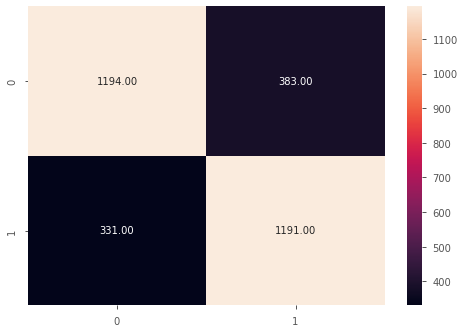

In [141]:
model(dt,x_train,x_test,y_train,y_test,train=False)

# Random Forest

In [142]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [143]:
model(rf,x_train,x_test,y_train,y_test,train=True)


99.62650435744916


80.76798967408841
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1577
           1       0.80      0.81      0.80      1522

    accuracy                           0.81      3099
   macro avg       0.81      0.81      0.81      3099
weighted avg       0.81      0.81      0.81      3099

****************************************************************************************************
cross_val_score 0.7994913144676054


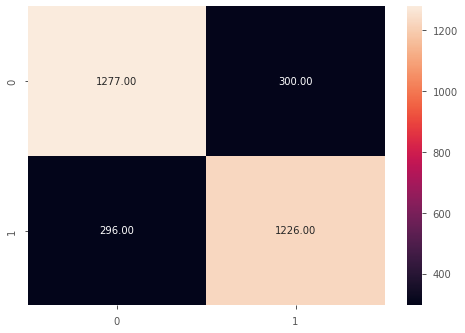

In [144]:
model(rf,x_train,x_test,y_train,y_test,train=False)


# GradientBoosting Classifier

In [145]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)


GradientBoostingClassifier()

In [146]:
model(gb,x_train,x_test,y_train,y_test,train=True)


83.53852538387052


82.22007099064214
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1577
           1       0.80      0.84      0.82      1522

    accuracy                           0.82      3099
   macro avg       0.82      0.82      0.82      3099
weighted avg       0.82      0.82      0.82      3099

****************************************************************************************************
cross_val_score 0.8110097063256365


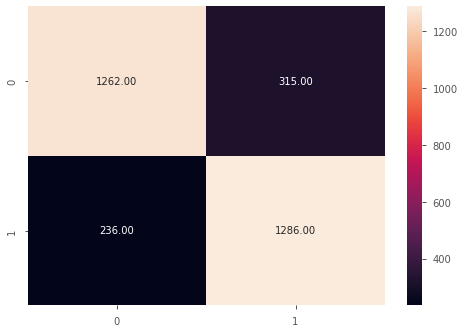

In [147]:
model(gb,x_train,x_test,y_train,y_test,train=False)


# XGBoost Classifier

In [148]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [149]:
model(xgb,x_train,x_test,y_train,y_test,train=True)


92.64075252455387


82.80090351726363
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1577
           1       0.82      0.84      0.83      1522

    accuracy                           0.83      3099
   macro avg       0.83      0.83      0.83      3099
weighted avg       0.83      0.83      0.83      3099

****************************************************************************************************
cross_val_score 0.8065590946700762


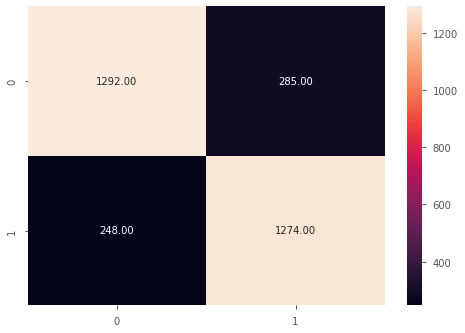

In [150]:
model(xgb,x_train,x_test,y_train,y_test,train=False)


# SVM

In [151]:
svc=SVC()
svc.fit(x_train,y_train)


SVC()

In [152]:
model(svc,x_train,x_test,y_train,y_test,train=True)


83.96735371420667


81.86511777992901
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1577
           1       0.80      0.83      0.82      1522

    accuracy                           0.82      3099
   macro avg       0.82      0.82      0.82      3099
weighted avg       0.82      0.82      0.82      3099

****************************************************************************************************
cross_val_score 0.802392851868954


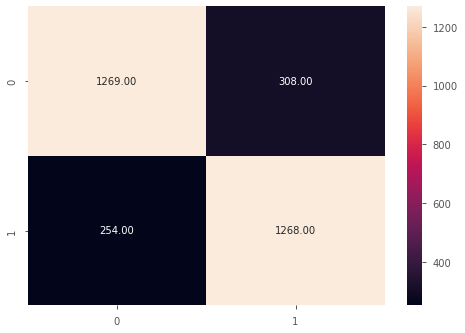

In [153]:
model(svc,x_train,x_test,y_train,y_test,train=False)


# Conclusion:- SVM, Logistic Regression and GradientBoosting Classifier is prone to less overfitting and similar Accuracy score,cross validation score and F1 score 

In [154]:
# Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV


In [155]:
# GradientBoosting Classifier
params={'n_estimators':[100],
       'learning_rate':[0.1,0.01,0.001,0.2,1,0.002],
       'max_depth':[4,5,6,7,8,9],
       'min_samples_split':[3,4,5,6,7],
       'min_samples_leaf':[3,4,5,7,9]}


In [156]:
gs=GridSearchCV(gb,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.2, 1, 0.002],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 7, 9],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100]})

In [158]:
gs.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [191]:
gb=GradientBoostingClassifier(learning_rate=0.2,max_depth=4,min_samples_leaf=3,min_samples_split=4,n_estimators=100)

In [192]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=3,
                           min_samples_split=4)

In [193]:
model(gb,x_train,x_test,y_train,y_test,train=True)


87.05215105823765


82.92997741206841
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1577
           1       0.81      0.85      0.83      1522

    accuracy                           0.83      3099
   macro avg       0.83      0.83      0.83      3099
weighted avg       0.83      0.83      0.83      3099

****************************************************************************************************
cross_val_score 0.8088815809520684


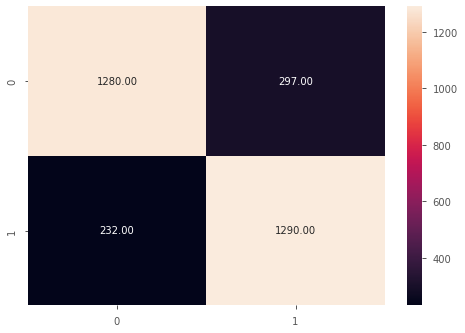

In [194]:
model(gb,x_train,x_test,y_train,y_test,train=False)


# Final Conclusion:- GradientBoosting Classifier gives better performing model.Best parameters are learning_rate=0.2,max_depth=4,min_samples_leaf=3,min_samples_split=4,n_estimators=100

In [195]:
y_pred=gb.predict(x_test)


In [196]:
Pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})


In [197]:
Pred

,Actual,Predicted
8636,1,1
3092,0,0
310,0,0
7259,1,1
2205,0,0
...,...,...
442,0,0
7571,1,1
935,0,1
5764,0,1


Text(0.5, 1.0, 'Actual vs Predicted')

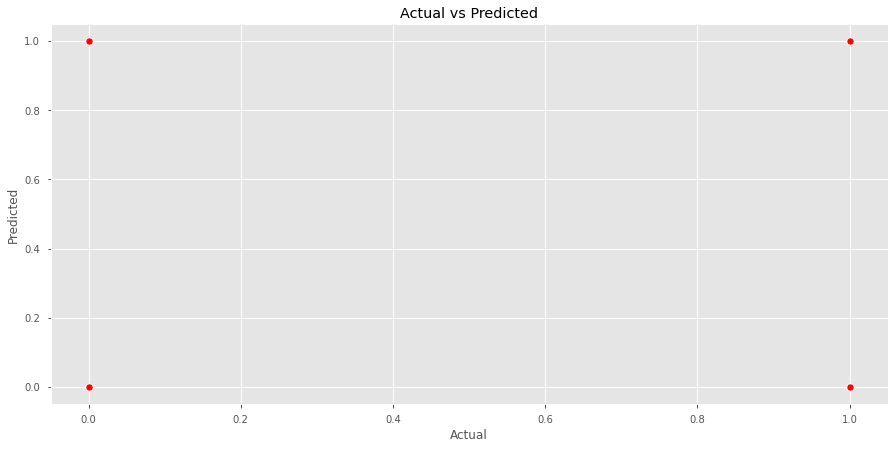

In [198]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


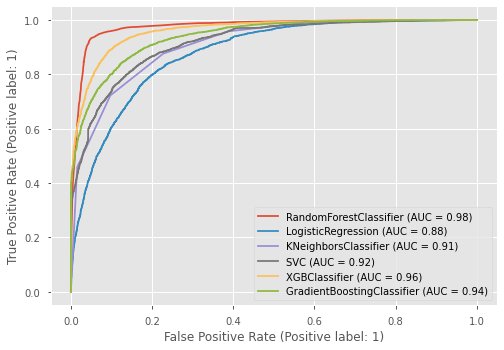

In [199]:
disp=plot_roc_curve(rf,x,y)
plot_roc_curve(lr,x,y,ax=disp.ax_)
plot_roc_curve(knn,x,y,ax=disp.ax_)
plot_roc_curve(svc,x,y,ax=disp.ax_)
plot_roc_curve(xgb,x,y,ax=disp.ax_)
plot_roc_curve(gb,x,y,ax=disp.ax_)


In [200]:
# Saving the model
import pickle
filename='Telecom_churn'
pickle.dump(rf,open(filename,'wb'))
